# Implementing a Key-Value Database

the goal of the project is to extend the BTree implemenation to implement a key-value store class

## Importing and Initializing

importing BTree class from btree.py file and declare class named KVStore with __init__


In [2]:
from btree import BTree

class KVStore(BTree):
    def __init__(self):
        super.__init__(self, split_threshold=2)

## Overriding the Add Method

overriding add() method so that it does not allow a user to add multiple entries

In [11]:
from btree import BTree

class KVStore(BTree):
    
    def __init__(self):
        super().__init__(split_threshold=2)
    
    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else:
            for i, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[i] = value

## Testing

create the tests for KVStore to see the split threshold, if we can add entries, if we can retrieve a value, and if we add two entries with the same key and different values

In [12]:
kv = KVStore()
assert kv.split_threshold == 2

for i in range(10):
    kv.add(i, i)

for i in range(10):
    assert kv.get_value(i) == i

for i in range(10):
    kv.add(i, i+1)

for i in range(10):
    assert kv.get_value(i) == i + 1

## Implementing the Item Getter and Setter

adding entries and retrieve values with brackets

In [13]:
from btree import BTree

class KVStore(BTree):
    
    def __init__(self):
        super().__init__(split_threshold=2)
    
    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else:
            for i, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[i] = value

    def __getitem__(self, key):
        return self.get_value(key)
    
    def __setitem__(self, key, value):
        self.add(key, value)

## Testing Getter and Setter

running the same tests with the bracket syntax

In [14]:
kv = KVStore()
assert kv.split_threshold == 2

for i in range(10):
    kv[i] = i

for i in range(10):
    assert kv[i] == i

for i in range(10):
    kv[i] = i + 1

for i in range(10):
    assert kv[i] == i + 1

## Enhancing the Contains Method

accessing contains() method with in operator

In [15]:
from btree import BTree

class KVStore(BTree):
    
    def __init__(self):
        super().__init__(split_threshold=2)
    
    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else:
            for i, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[i] = value

    def __getitem__(self, key):
        return self.get_value(key)
    
    def __setitem__(self, key, value):
        self.add(key, value)
    
    def __contains__(self,key):
        return self.contains(key)

## Testing the In Operator

testing the use of in operator

In [16]:
kv = KVStore()
for c in 'abcdefghijklmnopqrstuvwxyz':
    kv[c] = c

for c in 'abcdefghijklmnopqrstuvwxyz':
    assert c in kv, "Character is in the key-value store"

## Range Queries

making the range_query implementation more general with strings

In [17]:
from btree import BTree

class KVStore(BTree):
    
    def __init__(self):
        super().__init__(split_threshold=2)
    
    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else:
            for i, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[i] = value

    def __getitem__(self, key):
        return self.get_value(key)
    
    def __setitem__(self, key, value):
        self.add(key, value)
    
    def __contains__(self,key):
        return self.contains(key)
    
    def _range_query(self, range_start, range_end, current_node, min_key, max_key):
        if not self._range_intersects(range_start, range_end, min_key, max_key):
            return []
        results = []
        for i, key in enumerate(current_node.keys):
            if range_start <= key and key <= range_end:
                results.append(current_node.values[i])
        if not current_node.is_leaf():
            for i, child in enumerate(current_node.children):
                new_min_key = current_node.keys[i - 1] if i > 0 else min_key
                new_max_key = current_node.keys[i] if i < len(current_node) else max_key
                results += self._range_query(range_start, range_end, child, new_min_key, new_max_key)
        return results  

    def range_query(self, range_start, range_end):
        return self._range_query(range_start, range_end, self.root, float('-inf'), float('inf'))
    
    def _range_intersects(self, range_start, range_end, node_min, node_max):
        if not node_min is None and node_min > range_end:
            return False
        if not node_max is None and node_max < range_start:
            return False
        return True


In [18]:
class DictKVStore(dict):
    
    def range_query(self, range_start, range_end):
        result = []
        for key in self.keys():
            if range_start <= key and key <= range_end:
                result.append(self[key])
        return result

## Random Tests

testing the implementation

In [19]:
dict_kv = DictKVStore()
our_kv = KVStore()
for i in range(10):
    dict_kv[i] = i
    our_kv[i] = i

for range_start, range_end in [(1, 3), (4, 6), (1, 10), (5, 5)]:
    dict_res = sorted(dict_kv.range_query(range_start, range_end))
    our_res = sorted(our_kv.range_query(range_start, range_end))
    assert dict_res == our_res, "Both data structures return the same range query result."

write tests to ensure that KVStore is correct, using DictKVStore as a baseline. use random module to generate larger sets of key-value pairs in the tests

In [20]:
import random
random.seed(0)

NUM_INSERTS = 10
NUM_CONTAINS = 10
NUM_RANGE_QUERIES = 10

dict_kv = DictKVStore()

kv = KVStore()

print("Testing Insertion")
for _ in range(NUM_INSERTS):
    key = random.randint(0, 100)
    value = random.randint(0, 1000000)
    dict_kv[key] = value
    kv[key] = value
    
print("Testing Length")
assert len(dict_kv) == len(kv), "Wrong length. Length should be {} but is {}.".format(len(dict_kv), len(kv))
    

print("Testing Values")
for key in dict_kv:
    assert dict_kv[key] == kv[key], "Wrong value for key {}. Expected value {} but found value {}.".format(key, dict_kv[key], kv[key])

    
print("Testing in Operator")
for i in range(NUM_CONTAINS):
    key = random.randint(0, 1000)
    assert (key in dict_kv) == (key in kv), "Contains method did not return the correct value for key {}.".format(key)


print("Testing Range Queries")
for _ in range(NUM_RANGE_QUERIES):
    range_start = random.randint(0, 100)
    range_end = random.randint(range_start, 100)
    dict_results = dict_kv.range_query(range_start, range_end)
    kv_results = kv.range_query(range_start, range_end)
    assert len(dict_results) == len(kv_results), "Wrong number of reuslt in range query [{}, {}]. Should be {} but was {}.".format(range_start, range_end, len(dict_result), len(kv_result))
    dict_results.sort()
    kv_results.sort()
    assert dict_results == kv_results, "Wrong number of reuslt in range query [{}, {}]. Should be {} but was {}.".format(range_start, range_end, len(dict_result), len(kv_result))

Testing Insertion
Testing Length
Testing Values
Testing in Operator
Testing Range Queries


## Performance Testing

creating the test to compare runtime of range_query() method of the DictKVStore with the KVStore

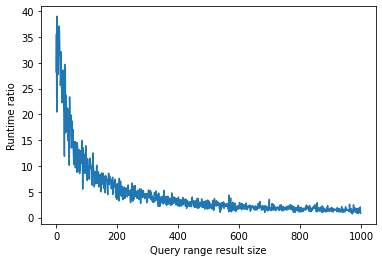

In [21]:
import time
import csv

dict_kv = DictKVStore()
our_kv = KVStore()

# Load the entries
with open('entries.csv', 'r') as f:
    rows = list(csv.reader(f))[1:]
    for row in rows:
        key = int(row[0])
        value = int(row[1])
        dict_kv[key] = value
        our_kv[key] = value

# Measure query times
time_ratios = []
with open('queries.csv', 'r') as f:
    rows = list(csv.reader(f))[1:]
    for row in rows:
        range_start = int(row[0])
        range_end = int(row[1])
        
        start = time.time()
        dict_kv.range_query(range_start, range_end)
        end = time.time()
        time_dict = end - start

        start = time.time()
        our_kv.range_query(range_start, range_end)
        end = time.time()
        time_kv = end - start

        time_ratios.append(time_dict / time_kv)

# Plot results
import matplotlib.pyplot as plt
plt.plot(time_ratios)
plt.xlabel('Query range result size')
plt.ylabel('Runtime ratio')
plt.show()